X-Coordinates are [10, 12, 14, 16, 18, 20]
Y-Coordinates are [42, 50, 58, 66, 74, 82]
0
Client Connected to Broker!












Published


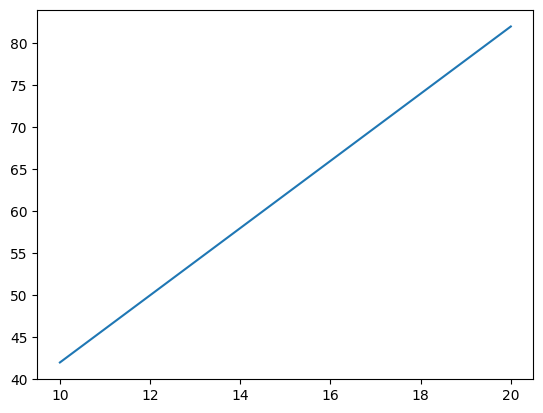

In [2]:
import matplotlib.pyplot as plt
import random
x_values = []
y_values = []
a = 10
x_values.append(a)
for i in range(5):
    x = x_values[i]+2
    x_values.append(x)
for a in range(6):
    y = 4*(x_values[a])+2
    y_values.append(y)
    
plt.plot(x_values, y_values)
print("X-Coordinates are", x_values)
print("Y-Coordinates are", y_values)
size = len(x_values)
import paho.mqtt.client as paho
import time

BROKER_NAME = "broker.hivemq.com"
PORT = 1883
TOPIC_PUB = "JIITMINOR1"
TOPIC_SUB = "JIITMINOR1"
fConnected = False

def on_connect(client, userdata, flags, rc):
    print(rc)

    if rc == 0:
        print("Client Connected to Broker!")
        global fConnected
        fConnected = True


def on_message(client, userdata, msg):
    print(msg.topic)
    print(msg.payload.decode("utf-8"))


def on_publish(client, userdata, msg):
    print("")


client = paho.Client("MQTT")
client.on_connect = on_connect
client.on_message = on_message
client.on_publish = on_publish
client.connect(BROKER_NAME,port = PORT)
client.loop_start()

while(fConnected != True):
    time.sleep(1)


client.subscribe(TOPIC_SUB)

while(True):
    time.sleep(1)
    a=0
    while a<size:
        keyInputx = x_values[a]
        keyInputy = y_values[a]
        client.publish(TOPIC_PUB, keyInputx)
        client.publish(TOPIC_PUB, keyInputy)
        #print(keyInputx,keyInputy)
        a=a+1
    client.loop_stop()
    break
    
print("Published")